In [2]:
%load_ext watermark
%watermark

2020-04-13T11:34:34-04:00

CPython 3.8.1
IPython 7.11.1

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('boston_dataset.csv')
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
df=  df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


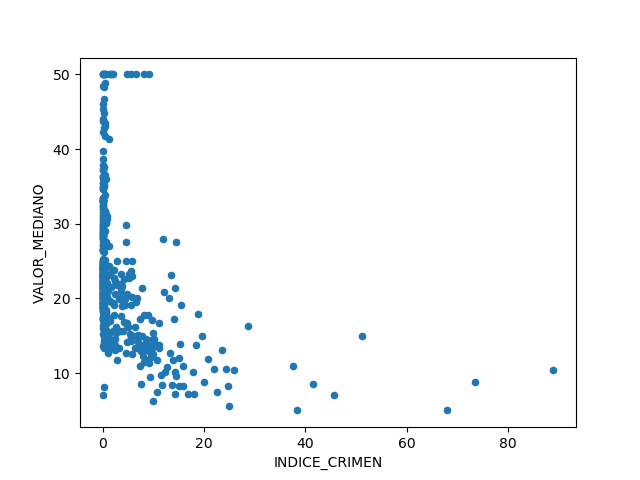

In [14]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")


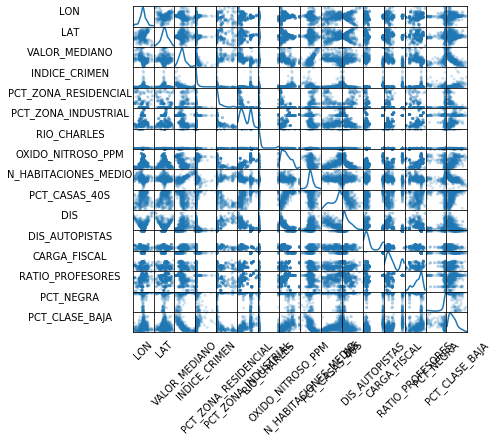

In [25]:
from pandas.plotting import scatter_matrix



sm = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-3,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(0.5,-0.3) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];


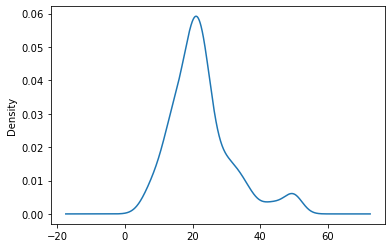

In [24]:
%matplotlib inline
df.VALOR_MEDIANO.plot.kde()

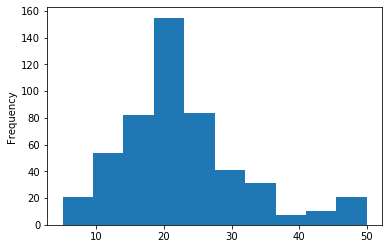

In [26]:
df.VALOR_MEDIANO.plot.hist()

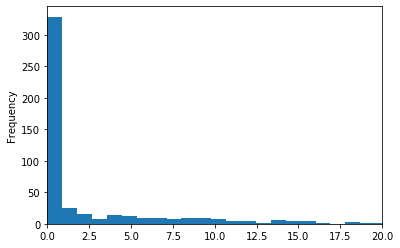

In [32]:
df.INDICE_CRIMEN.plot.hist(xlim=(0,20),bins=100)

In [40]:
valor_por_ciudad = df.groupby('CIUDAD')["VALOR_MEDIANO"].mean()

valor_por_ciudad

CIUDAD
Arlington     25.2000
Ashland       21.4000
Bedford       30.1000
Belmont       36.2000
Beverly       20.8000
               ...   
Weymouth      20.0375
Wilmington    20.1000
Winchester    33.1000
Winthrop      21.5800
Woburn        21.3000
Name: VALOR_MEDIANO, Length: 92, dtype: float64

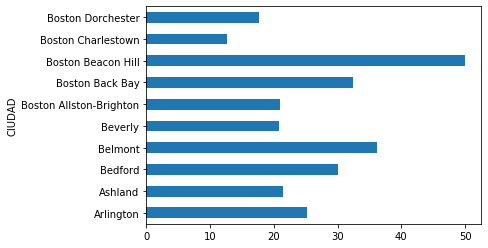

In [43]:
valor_por_ciudad.head(10).plot.barh()

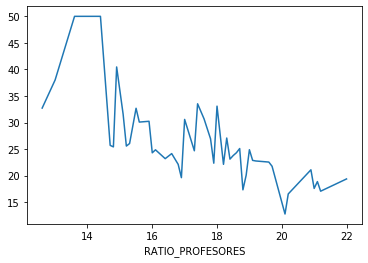

In [47]:
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot.line()

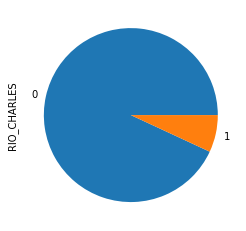

In [49]:
df.RIO_CHARLES.value_counts().plot.pie().ipynb_checkpoints/